In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from xgboost import XGBClassifier

In [31]:
df = pd.read_csv('dataset_clean.csv')

## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [73]:
RSEED = 101

In [74]:
df.columns

Index(['Date', 'price', 'res_load', 'temp', 'wind', 'gen_total', 'gen_bio',
       'gen_hyd', 'gen_windoff', 'gen_windon', 'gen_pv', 'gen_reother',
       'gen_nuc', 'gen_bcoal', 'gen_hcoal', 'gen_gas', 'gen_pump', 'gen_other',
       'gen_f_total', 'gen_f_windoff', 'gen_f_windon', 'gen_f_pv',
       'gen_f_other', 'dm', 'dm_f', 'netex', 'mres+', 'mres-', 'sres+',
       'sres-', 'gen_delta', 'gen_windoff_delta', 'gen_windon_delta',
       'gen_pv_delta', 'dm_delta', 'dm_gen_delta', 'day', 'weekend', 'month',
       'season', 'hour', 'peak', 'lag1', 'price_change', 'price_diff',
       'price_diff_pos', 'price_pos', 'price_diff_bins', 'price_bins'],
      dtype='object')

In [75]:
X1 = df[['res_load', 'temp', 'wind', 'gen_total', 'gen_bio',
       'gen_hyd', 'gen_windoff', 'gen_windon', 'gen_pv', 'gen_reother',
       'gen_nuc', 'gen_bcoal', 'gen_hcoal', 'gen_gas', 'gen_pump', 'gen_other',
       'gen_f_total', 'gen_f_windoff', 'gen_f_windon', 'gen_f_pv',
       'gen_f_other', 'dm', 'dm_f', 'netex', 'mres+', 'gen_delta', 'gen_windoff_delta', 'gen_windon_delta',
       'gen_pv_delta', 'dm_delta', 'day', 'month', 'season', 'hour',
       'peak']]

In [76]:
X = X1
y = df.price_diff_pos

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED, stratify=y)

In [77]:
#df_train = pd.concat([y_train, X_train], axis=1)

In [78]:
#from sklearn.utils import resample

#df_0 = df_train[df_train.target==0]
#df_1 = df_train[df_train.target==1]

#df_0d2 = resample(df_0, replace=False, n_samples=50000, random_state=5)
#df_1u2 = resample(df_1, replace=True, n_samples=50000, random_state=5)
#df_b = pd.concat([df_0d2, df_1u2])

#df_train = df_b.copy()

#X_train = df_train.drop('target', axis=1)
#y_train = df_train['target']

## Fill Missing Values

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## XGBoost

In [80]:
XGB = XGBClassifier(n_estimators=100)
XGB.fit(X_train, y_train)
predictions = XGB.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix for XGBoost Classifier')

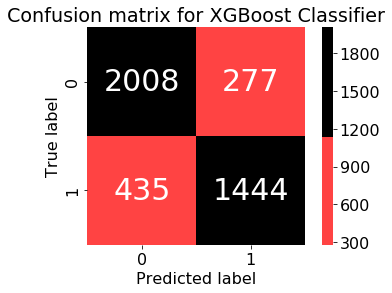

In [81]:
from sklearn.metrics import confusion_matrix

colors = ['k', '#FF4343']
colors_r = ['#FF4343', 'k', '#FF4343', 'k']

plt.figure()
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size":30}, cmap=colors_r, center=2010, square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for XGBoost Classifier')

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2285
           1       0.84      0.77      0.80      1879

    accuracy                           0.83      4164
   macro avg       0.83      0.82      0.83      4164
weighted avg       0.83      0.83      0.83      4164



In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)

0.8236342483955452

## Hyperparameter Tuning via Randomized Search

In [84]:
X1 = df[['res_load', 'temp', 'wind', 'gen_total', 'gen_bio',
       'gen_hyd', 'gen_windoff', 'gen_windon', 'gen_pv', 'gen_reother',
       'gen_nuc', 'gen_bcoal', 'gen_hcoal', 'gen_gas', 'gen_pump', 'gen_other',
       'gen_f_total', 'gen_f_windoff', 'gen_f_windon', 'gen_f_pv',
       'gen_f_other', 'dm', 'dm_f', 'netex', 'mres+', 'gen_delta', 'gen_windoff_delta', 'gen_windon_delta',
       'gen_pv_delta', 'dm_delta', 'day', 'month', 'season', 'hour',
       'peak']]

In [85]:
X = X1
y = df.price_diff_pos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RSEED, stratify=y)

In [86]:
#df_train_s = pd.concat([y_train_s, X_train_s], axis=1)

In [87]:
#from sklearn.utils import resample

#df_0_s = df_train_s[df_train_s.target==0]
#df_1_s = df_train_s[df_train_s.target==1]

#df_0d2_s = resample(df_0_s, replace=False, n_samples=10000, random_state=5)
#df_1u2_s = resample(df_1_s, replace=True, n_samples=10000, random_state=5)
#df_b_s = pd.concat([df_0d2_s, df_1u2_s])

#df_train_s = df_b_s.copy()

#X_train_s = df_train_s.drop('target', axis=1)
#y_train_s = df_train_s['target']

In [88]:
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the classifier
estimator = XGBClassifier(base_estimator=DecisionTreeClassifier(), random_state=RSEED)

# TODO: Create the parameters list you wish to tune
param_grid = {'n_estimators' : [25, 200], 
              'learning_rate' : [1., 5],
              'base_estimator__min_samples_split' : np.arange(6, 12, 2),
              'base_estimator__max_depth' : np.arange(1, 4, 1)
             }

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_search = RandomizedSearchCV(estimator, param_grid, scoring=scorer, n_jobs = -1,
                                cv = 3, n_iter = 10, verbose = 1, random_state=RSEED)

# TODO: Fit the grid search object to the training data and find the optimal parameters
gs_fit = grid_search.fit(X_train, y_train)

# Get the estimator
gs_fit.best_estimator_

# Make predictions using the unoptimized and model
#predictions = (clf.fit(X_train_s, y_train_s)).predict(X_test_s)
#best_predictions = best_clf.predict(X_test_s)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.4s finished


XGBClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=2,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=10,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'),
              base_score=0.5, booster='gbtree', colsample_

### Best Model

In [96]:
XGB_best = XGBClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=1.0, n_estimators=25, random_state=101)
XGB_best.fit(X_train, y_train)
predictions = XGB_best.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix for XGBoost Classifier')

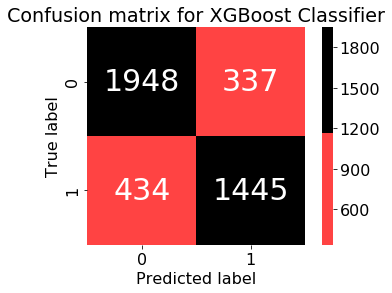

In [97]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)

colors = ['k', '#FF4343']
colors_r = ['#FF4343', 'k', '#FF4343', 'k']
plt.figure()
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size":30}, cmap=colors_r, center=2000, square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for XGBoost Classifier')

In [98]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2285
           1       0.81      0.77      0.79      1879

    accuracy                           0.81      4164
   macro avg       0.81      0.81      0.81      4164
weighted avg       0.81      0.81      0.81      4164



### Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
recall = cross_val_score(XGB_best, X_train, y_train, cv=5, scoring='recall')
print('Recall', np.mean(recall), recall)

Recall 0.7600209556533066 [0.75177305 0.75265957 0.77748227 0.75066548 0.7675244 ]


## Feature Importance

In [28]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X.columns.values[indices[:7]]
    values = importances[indices][:7]

    # Creat the plot
    fig = plt.figure(figsize = (15,8))
    plt.title("Normalized Weights for First Ten Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(7), values, width = 0.5, align="center", color = '#FF4343', \
          label = "Feature Weight")
    plt.bar(np.arange(7) - 0.3, np.cumsum(values), width = 0.5, align = "center", color = 'k', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(10), columns, rotation=70)
    plt.xlim((-0.5, 6.5))
    plt.ylabel("Weight", fontsize = 16)
    plt.xlabel("Feature", fontsize = 16)
    
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('font', size=16)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

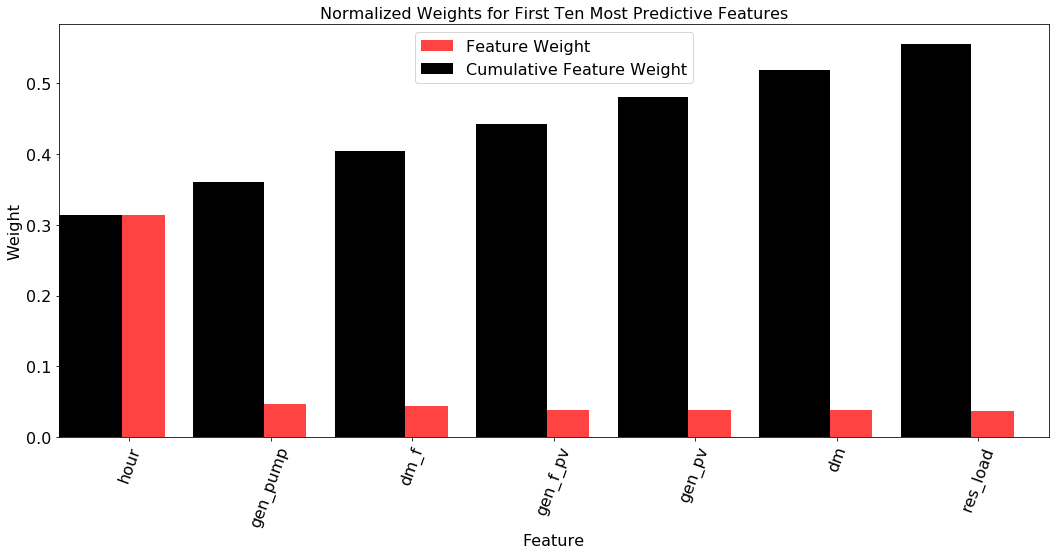

In [29]:
# TODO: Train the supervised model on the training set 
model = XGBClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)